<a href="https://colab.research.google.com/github/shullaw/maths/blob/main/Probability_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Calculating Marginal Probabilities

In [107]:
import numpy as np
import pandas as pd

In [108]:
def roll_dice(count):

  outcomes = np.array([1, 2, 3, 4, 5, 6])
  rolls = []

  for _ in range(count):
    roll = np.random.choice(outcomes)
    rolls.append(roll)

  for i in range (len(outcomes)):
    print(f'Proportion of {i}: ', rolls.count(i) / count)
  
  return rolls

In [109]:
dice_rolls1 = roll_dice(10000)

Proportion of 0:  0.0
Proportion of 1:  0.168
Proportion of 2:  0.1624
Proportion of 3:  0.1693
Proportion of 4:  0.1672
Proportion of 5:  0.1687


In [110]:
dice_rolls2 = roll_dice(10000)

Proportion of 0:  0.0
Proportion of 1:  0.1705
Proportion of 2:  0.1648
Proportion of 3:  0.1743
Proportion of 4:  0.1641
Proportion of 5:  0.1623


In [111]:
df = pd.DataFrame(data = {'Dice1': dice_rolls1, 'Dice2': dice_rolls2})
df.shape

(10000, 2)

In [112]:
df.sample(5)

,Dice1,Dice2
5427,6,5
304,2,2
1437,1,4
2673,6,2
4169,3,1


In [113]:
crosstab_rolls = pd.crosstab(df['Dice1'], df['Dice2'])
crosstab_rolls  # frequency counts

Dice2,1,2,3,4,5,6
Dice1,,,,,,
1,278,270,311,273,261,287
2,289,273,248,295,241,278
3,293,270,313,281,267,269
4,273,295,283,275,287,259
5,314,259,289,251,303,271
6,258,281,299,266,264,276


In [114]:
crosstab_rolls = pd.crosstab(df['Dice1'], df['Dice2'], normalize=True)
crosstab_rolls  # proportions/probabilities

Dice2,1,2,3,4,5,6
Dice1,,,,,,
1,0.0278,0.0270,0.0311,0.0273,0.0261,0.0287
2,0.0289,0.0273,0.0248,0.0295,0.0241,0.0278
3,0.0293,0.0270,0.0313,0.0281,0.0267,0.0269
4,0.0273,0.0295,0.0283,0.0275,0.0287,0.0259
5,0.0314,0.0259,0.0289,0.0251,0.0303,0.0271
6,0.0258,0.0281,0.0299,0.0266,0.0264,0.0276


Applying the Chain Rule

-  Joint Probabilities

In [115]:
crosstab_rolls[1][1]  # joint probabilty of die 1 == 1 and die 2 == 1

0.0278

In [116]:
# joint probability of die 1 even && die 2 being 1; being mutually exclusive events
# die 1 == 2 or die 1 == 4 or die 1 == 6 and die 1 == 1
crosstab_rolls[2][1] + crosstab_rolls[4][1] + crosstab_rolls[6][1]

0.083

In [117]:
# probability of two die rolling matching numbers
result = 0
for x in range(1,7):
  result += crosstab_rolls[x][x]
result

0.1718

-  Marginal Probabilities

In [118]:
crosstab_rolls = pd.crosstab(df['Dice1'], df['Dice2'], normalize=True, margins=True)
crosstab_rolls  # marginal values (sums) are given in the 'All' row and column

Dice2,1,2,3,4,5,6,All
Dice1,,,,,,,
1,0.0278,0.0270,0.0311,0.0273,0.0261,0.0287,0.1680
2,0.0289,0.0273,0.0248,0.0295,0.0241,0.0278,0.1624
3,0.0293,0.0270,0.0313,0.0281,0.0267,0.0269,0.1693
4,0.0273,0.0295,0.0283,0.0275,0.0287,0.0259,0.1672
5,0.0314,0.0259,0.0289,0.0251,0.0303,0.0271,0.1687
6,0.0258,0.0281,0.0299,0.0266,0.0264,0.0276,0.1644
All,0.1705,0.1648,0.1743,0.1641,0.1623,0.1640,1.0000


In [119]:
# probability of die 2 being 4 (row 4 column 'All')
result = 0
for x in range(1,7):
  result += crosstab_rolls[x][4]
result

0.16720000000000002

In [120]:
# probability of die 2 being 6 (row 6 column 'All')
result = 0
for x in range(1,7):
  result += crosstab_rolls[x][6]
result

0.1644

Conditional probability of die 1's value given die 2's value

In [121]:
crosstab_rolls = pd.crosstab(df['Dice1'], df['Dice2'], normalize='columns')
crosstab_rolls  # all values in each column are divided by sum of values in that column

Dice2,1,2,3,4,5,6
Dice1,,,,,,
1,0.163050,0.163835,0.178428,0.166362,0.160813,0.175000
2,0.169501,0.165655,0.142283,0.179768,0.148490,0.169512
3,0.171848,0.163835,0.179575,0.171237,0.164510,0.164024
4,0.160117,0.179005,0.162364,0.167581,0.176833,0.157927
5,0.184164,0.157160,0.165806,0.152956,0.186691,0.165244
6,0.151320,0.170510,0.171543,0.162096,0.162662,0.168293


Conditional probability of die 2's value given die 1's value

In [122]:
crosstab_rolls = pd.crosstab(df['Dice1'], df['Dice2'], normalize='index')
crosstab_rolls  # all values in each row are divided by sum of values in that row

Dice2,1,2,3,4,5,6
Dice1,,,,,,
1,0.165476,0.160714,0.185119,0.162500,0.155357,0.170833
2,0.177956,0.168103,0.152709,0.181650,0.148399,0.171182
3,0.173066,0.159480,0.184879,0.165978,0.157708,0.158890
4,0.163278,0.176435,0.169258,0.164474,0.171651,0.154904
5,0.186129,0.153527,0.171310,0.148785,0.179609,0.160640
6,0.156934,0.170925,0.181873,0.161800,0.160584,0.167883


Joint Probability with Dependent Variables

In [123]:
from sympy.stats import P, Die
from sympy import Eq

In [124]:
X = Die('X', 6)

In [125]:
print('Probability of rolling 1 or 2: ', P(Eq(X, 1)) + P(Eq(X, 2)))  #mutually exclusive events

Probability of rolling 1 or 2:  1/3


In [126]:
print('Probability of rolling 3 or 6: ', P(Eq(X, 3)) + P(Eq(X, 6)))  #mutually exclusive events

Probability of rolling 3 or 6:  1/3


In [127]:
print('Probability of rolling 2, 4 or 6: ', P(Eq(X, 2)) + P(Eq(X, 4)) + P(Eq(X, 6)))  #mutually exclusive events

Probability of rolling 2, 4 or 6:  1/2


In [128]:
print('Probability of rolling 4, 5 or 6: ', P(X > 3))

Probability of rolling 4, 5 or 6:  1/2


In [129]:
print('Probability of rolling 1 or 2: ', P(X <= 2))

Probability of rolling 1 or 2:  1/3


In [130]:
X = Die('X', 6)
Y = Die('Y', 6)

In [131]:
print('Probability of dice1 = 3 and dice2 = 3: ', P(Eq(X, 3)) * P(Eq(Y, 3)))  # not mutually exclusive (independent)

Probability of dice1 = 3 and dice2 = 3:  1/36


In [132]:
probability = 0
print('Probability of dice1 = odd and dice2 = even:\n')
for x in range(1, 7, 2):
  for y in range(2, 7, 2): 
    probability += P(Eq(X, x)) * P(Eq(Y, y))
print(probability)  # P(x = even) = 1/2, P(y = odd) = 1/2, 1/2 * 1/2 = 1/4

Probability of dice1 = odd and dice2 = even:

1/4


In [133]:
probability = 0
x = 6
print('Probability of dice1 = 6 and dice2 = any value:\n')
for y in range(1,7): 
    probability += P(Eq(X, x)) * P(Eq(Y, y))
print(probability)  # P(x = 6) = 1 /6, P(y = 1,2,3,4,5, or 6) = 1/6*6, 1/6 * 1/6 * 6 = 1/6

Probability of dice1 = 6 and dice2 = any value:

1/6


In [134]:
print('Probability of dice1 = 6 given that dice2 = any value: ', P(Eq(Y, 6)))


Probability of dice1 = 6 given that dice2 = any value:  1/6


## Computing Marginal and Dependent Probabilities with Dependent Variables

-  On real world data

In [135]:
df = pd.read_csv('./bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [136]:
df.shape

(11162, 17)

In [137]:
crosstab_marital = pd.crosstab(df['job'], df['marital'])
crosstab_marital


marital,divorced,married,single
job,,,
admin.,182,677,475
blue-collar,149,1335,460
entrepreneur,42,234,52
housemaid,46,190,38
management,288,1428,850
retired,171,581,26
self-employed,39,222,144
services,121,504,298
student,2,15,343


In [138]:
crosstab_marital_prob = pd.crosstab(df['job'], df['marital'], normalize=True)
crosstab_marital_prob

marital,divorced,married,single
job,,,
admin.,0.016305,0.060652,0.042555
blue-collar,0.013349,0.119602,0.041211
entrepreneur,0.003763,0.020964,0.004659
housemaid,0.004121,0.017022,0.003404
management,0.025802,0.127934,0.076151
retired,0.015320,0.052052,0.002329
self-employed,0.003494,0.019889,0.012901
services,0.010840,0.045153,0.026698
student,0.000179,0.001344,0.030729


In [139]:
crosstab_marital_prob['single']['admin.']  # joint probabilities

0.0425550976527504

In [140]:
crosstab_marital_prob['divorced']['retired'] + \
crosstab_marital_prob['single']['retired']

0.017649166815982796

In [141]:
crosstab_marginal = pd.crosstab(df['job'], df['marital'], normalize=True, margins=True)
crosstab_marginal

marital,divorced,married,single,All
job,,,,
admin.,0.016305,0.060652,0.042555,0.119513
blue-collar,0.013349,0.119602,0.041211,0.174162
entrepreneur,0.003763,0.020964,0.004659,0.029385
housemaid,0.004121,0.017022,0.003404,0.024548
management,0.025802,0.127934,0.076151,0.229887
retired,0.015320,0.052052,0.002329,0.069701
self-employed,0.003494,0.019889,0.012901,0.036284
services,0.010840,0.045153,0.026698,0.082691
student,0.000179,0.001344,0.030729,0.032252


In [142]:
crosstab_marginal['All']['blue-collar']

0.17416233649883534

In [143]:
crosstab_marginal['All']['services']

0.0826912739652392

In [144]:
crosstab_marginal['married']['All']

0.5689840530370901

In [145]:
crosstab_marginal['divorced']['All']

0.11583945529475005

In [146]:
crosstab_conditional = pd.crosstab(df['job'], df['marital'], normalize='columns')
crosstab_conditional

marital,divorced,married,single
job,,,
admin.,0.140758,0.106597,0.135020
blue-collar,0.115236,0.210203,0.130756
entrepreneur,0.032483,0.036845,0.014781
housemaid,0.035576,0.029917,0.010802
management,0.222738,0.224846,0.241615
retired,0.132251,0.091482,0.007391
self-employed,0.030162,0.034955,0.040932
services,0.093581,0.079358,0.084707
student,0.001547,0.002362,0.097499


$$ \frac{P(married)P(technician)}{P(married)} = P(married|technician)$$

In [147]:
crosstab_marginal['married']['technician'] / crosstab_marginal['married']['All']

0.14643363249881908

In [148]:
crosstab_conditional['married']['technician']

0.14643363249881908

In [149]:
crosstab_marginal['divorced']['services'] / crosstab_marginal['divorced']['All']

0.09358081979891725

In [150]:
crosstab_conditional['divorced']['services']

0.09358081979891725

In [151]:
crosstab_conditional = pd.crosstab(df['job'], df['marital'], normalize='index')
crosstab_conditional

marital,divorced,married,single
job,,,
admin.,0.136432,0.507496,0.356072
blue-collar,0.076646,0.686728,0.236626
entrepreneur,0.128049,0.713415,0.158537
housemaid,0.167883,0.693431,0.138686
management,0.112237,0.556508,0.331255
retired,0.219794,0.746787,0.033419
self-employed,0.096296,0.548148,0.355556
services,0.131094,0.546046,0.322860
student,0.005556,0.041667,0.952778


$$ \frac{P(single)P(management)}{P(management)} = P(single | management)$$

In [152]:
crosstab_marginal['single']['management'] / crosstab_marginal['All']['management']

0.33125487139516757

In [153]:
crosstab_conditional['single']['management']

0.33125487139516757

In [154]:
crosstab_marginal['divorced']['student'] / crosstab_marginal['All']['student']

0.005555555555555556

In [155]:
crosstab_conditional['divorced']['student']

0.005555555555555556

## Computing the Expected Value of a Random Variable

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
def roll_dice(count):

  outcomes = np.array([1, 2, 3, 4, 5, 6])
  rolls1 = []
  rolls2 = []
  rolls3 = []

  for _ in range(count):
    
    roll1 = np.random.choice(outcomes)
    rolls1.append(roll1)

    roll2 = np.random.choice(outcomes)
    rolls2.append(roll2)

    roll3 = np.random.choice(outcomes)
    rolls3.append(roll3)
  
  return rolls1, rolls2, rolls3


In [158]:
rolls1, rolls2, rolls3 = roll_dice(10)

<function matplotlib.pyplot.show>

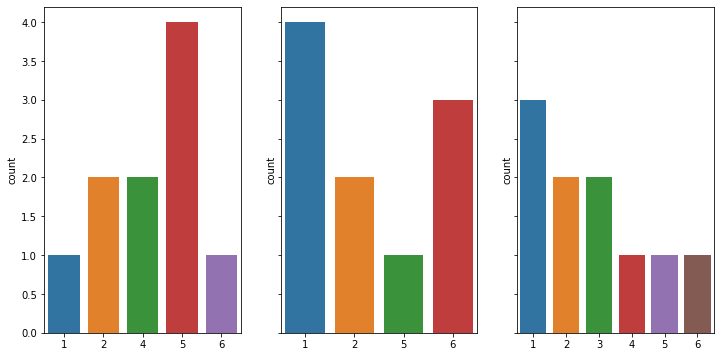

In [159]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True,
                                    figsize=(12,6))

sns.countplot(x = rolls1, ax=ax1)
sns.countplot(x = rolls2, ax=ax2)
sns.countplot(x = rolls3, ax=ax3)

plt.show

In [160]:
sums = np.add(rolls1, rolls2)
sums = np.add(sums, rolls3)

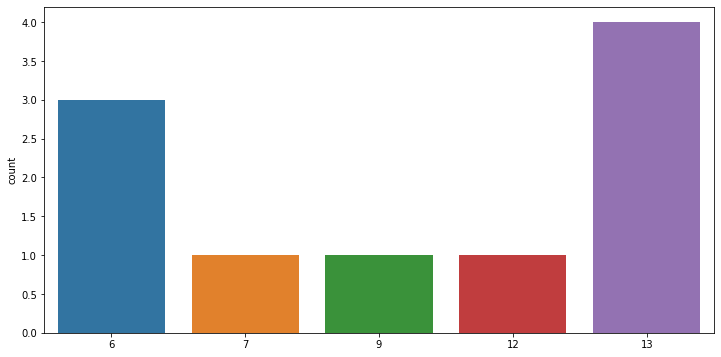

In [161]:
plt.figure(figsize=(12, 6))

sns.countplot(x = sums)

plt.show()

<function matplotlib.pyplot.show>

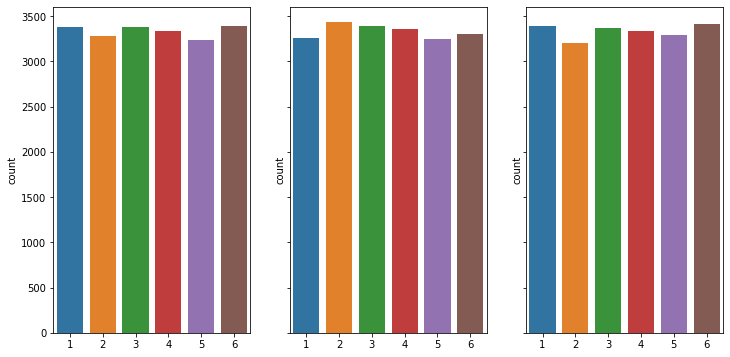

In [162]:
rolls1, rolls2, rolls3 = roll_dice(20000)

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True,
                                    figsize=(12,6))

sns.countplot(x = rolls1, ax=ax1)
sns.countplot(x = rolls2, ax=ax2)
sns.countplot(x = rolls3, ax=ax3)

plt.show

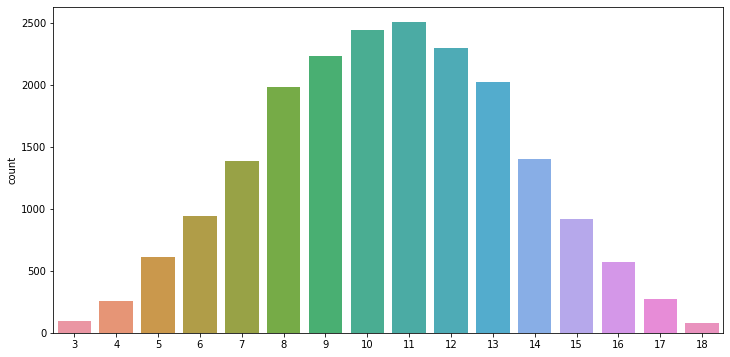

In [163]:
sums = np.add(rolls1, rolls2)
sums = np.add(sums, rolls3)
plt.figure(figsize=(12, 6))

sns.countplot(x = sums)

plt.show()

In [164]:
def expected(outcomes, probs):
  assert(len(outcomes) == len(probs))
  ev = 0
  for out, prob in zip(outcomes, probs):
    ev += out * prob

  return ev

In [171]:
def variance(outcomes, probs):
    assert(len(outcomes) == len(probs))
    mean_x = expected(outcomes, probs)
    var = []
    for out, prob in zip(outcomes, probs):
      var_case = (out**2) * prob
      var.append(var_case)

    var_total = 0
    for x in var:
      var_total += x

    return (var_total - mean_x**2)


In [166]:
rolling_outcomes = [1,2,3,4,5,6]
rolling_probs = [1/6,1/6,1/6,1/6,1/6,1/6]

In [167]:
ev = expected(rolling_outcomes, rolling_probs)
ev

3.5

In [172]:
roll_var = variance(rolling_outcomes, rolling_probs)
roll_var

2.916666666666666

In [176]:
from sympy.stats import E, Die, variance
from sympy import simplify

X = Die('X', 6)

print('Probability of each outcome: ', P(Eq(X, 1)))

print('Expected value: ', E(X))

print('Variance: ', variance(X))

Probability of each outcome:  1/6
Expected value:  7/2
Variance:  35/12


In [178]:
X, Y, Z = Die('X', 6), Die('Y', 6), Die('Z', 6)

print('Expected value: ', E(X + Y + Z))

print('Variance: ', variance(X + Y + Z))

Expected value:  21/2
Variance:  35/4
